In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [29]:
#bring in the six packs
df_train = pd.read_csv('./input/train.csv')

In [30]:
#check the decoration
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

## Sale Price EDA

In [4]:
#descriptive statistics summary
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

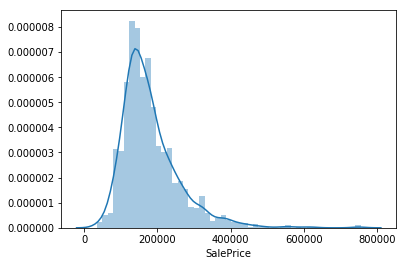

In [5]:
#histogram
sns.distplot(df_train['SalePrice']);

* Deviate from the normal distribution.
* Have appreciable positive skewness.
* Show peakedness.

### Skewness and Kurtosis

In [6]:
#https://brownmath.com/stat/shape.htm
print("Skewness: %f" % df_train['SalePrice'].skew())
print("Kurtosis: %f" % df_train['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


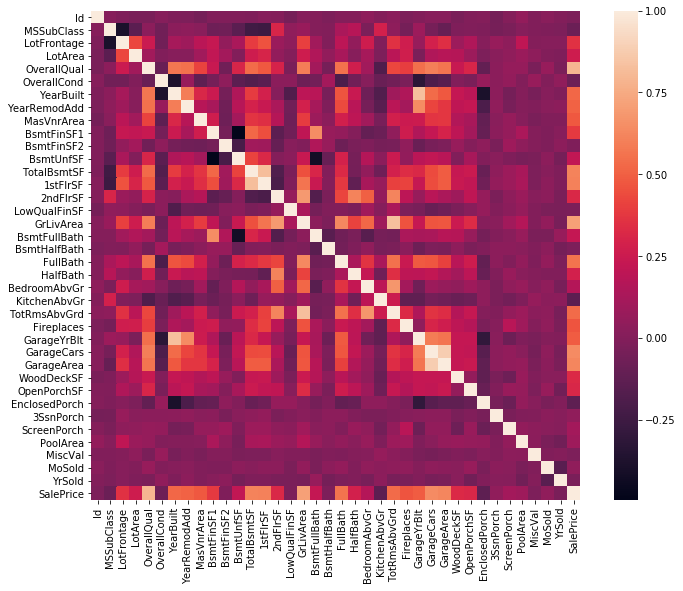

In [7]:
#correlation matrix
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=1, square=True);

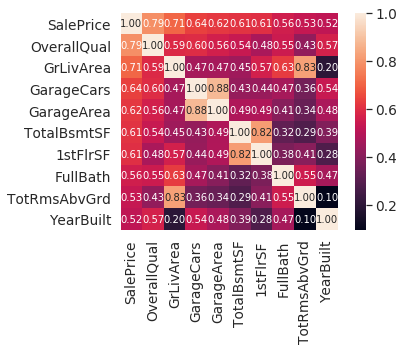

In [8]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

### NaN

In [9]:
df_train.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageCars          0
GarageArea          0
GarageQual         81
GarageCond         81
PavedDrive

first, we will turn categorical data into numerical data using LabelEncoder.
then, we will use imputer to fill in the mean values for missing data
from sklearn.preprocessing import Imputer

df_train.dtypes == object
#imp = Imputer()
#df_train = imp.fit_transform(df_train)

* We will try 1) drop, 2) fill with 0, and 3) fill with mean

In [10]:
for k in df_train.keys():
    s = df_train[k]
    if (df_train[k].dtype == 'int64'):
        df_train[k] = s.fillna(np.mean(df_train[k]))
    if (df_train[k].dtype == 'float64'):
        df_train[k] = s.fillna(np.mean(df_train[k]))

### missing values - if wanted to do with filling in with 0's.
for k in df_train.keys():
    s = df_train[k]
    na_cnt = sum(s.isna())
    if na_cnt > 0:
        if (df_train[k].dtype)
        #df_train[k] = s.dropna()
        #df_train[k] = s.fillna(0.0)

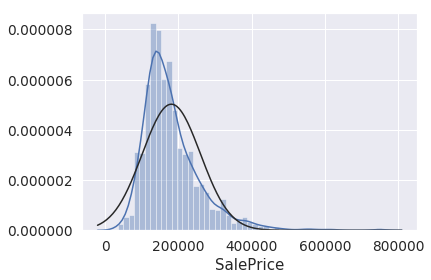

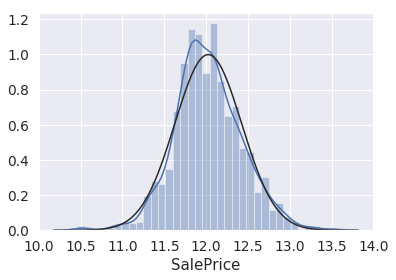

<Figure size 432x288 with 0 Axes>

In [11]:
#histogram and normal probability plot
sns.distplot(df_train['SalePrice'], fit=norm);
fig = plt.figure()
#applying log transformation
df_train['SalePrice'] = np.log(df_train['SalePrice'])
#transformed histogram and normal probability plot
sns.distplot(df_train['SalePrice'], fit=norm);
fig = plt.figure()

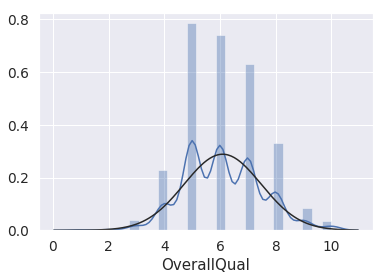

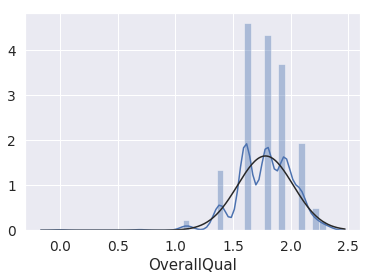

<Figure size 432x288 with 0 Axes>

In [12]:
#histogram and normal probability plot
sns.distplot(df_train['OverallQual'], fit=norm);
fig = plt.figure()
#data transformation
df_train['OverallQual'] = np.log(df_train['OverallQual'])
#transformed histogram and normal probability plot
sns.distplot(df_train['OverallQual'], fit=norm);
fig = plt.figure()

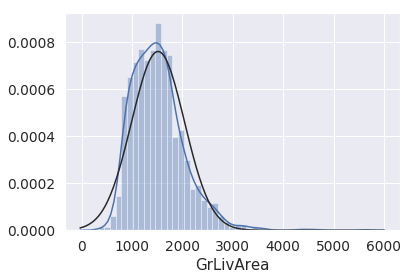

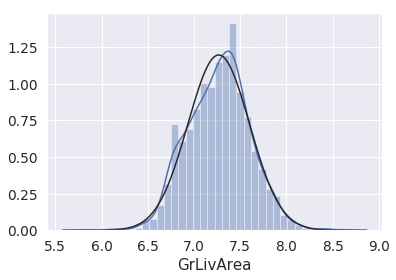

<Figure size 432x288 with 0 Axes>

In [13]:
#histogram and normal probability plot
sns.distplot(df_train['GrLivArea'], fit=norm);
fig = plt.figure()
#data transformation
df_train['GrLivArea'] = np.log(df_train['GrLivArea'])
#transformed histogram and normal probability plot
sns.distplot(df_train['GrLivArea'], fit=norm);
fig = plt.figure()

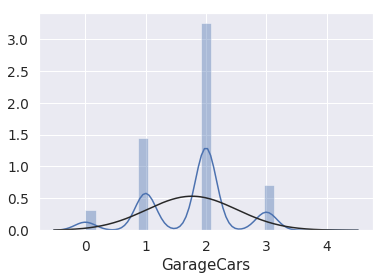

<Figure size 432x288 with 0 Axes>

In [14]:
#histogram and normal probability plot
sns.distplot(df_train['GarageCars'], fit=norm);
fig = plt.figure()
## data transformation of log fails. So, not using GarageCars
#data transformation
#df_train['GarageCars'] = np.log(df_train['GarageCars'])
#transformed histogram and normal probability plot
#sns.distplot(df_train['GarageCars'], fit=norm);
#fig = plt.figure()

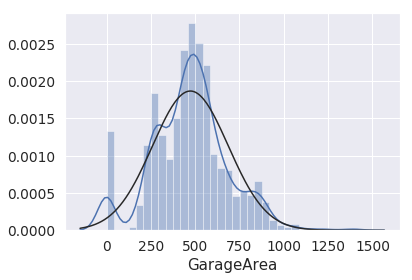

<Figure size 432x288 with 0 Axes>

In [20]:
#histogram and normal probability plot
sns.distplot(df_train['GarageArea'], fit=norm);
fig = plt.figure()
#data transformation
#df_train['GarageArea'] = np.log(df_train['GarageArea'])
#transformed histogram and normal probability plot
#sns.distplot(df_train['GarageArea'], fit=norm);
#fig = plt.figure()

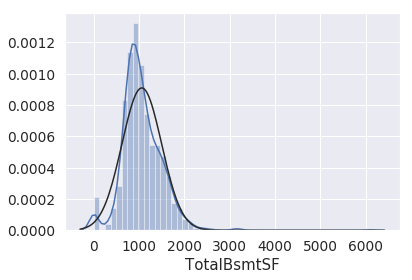

<Figure size 432x288 with 0 Axes>

In [25]:
#histogram and normal probability plot
sns.distplot(df_train['TotalBsmtSF'], fit=norm);
fig = plt.figure()
#data transformation
#df_train['TotalBsmtSF'] = np.log(df_train['TotalBsmtSF'])
#transformed histogram and normal probability plot
#sns.distplot(df_train['TotalBsmtSF'], fit=norm);
#fig = plt.figure()

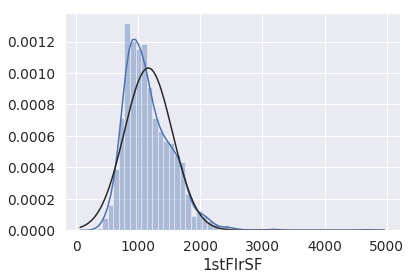

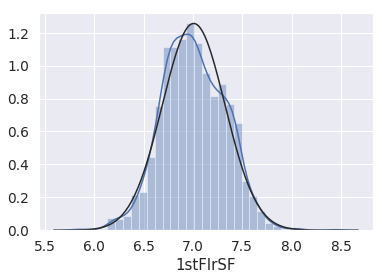

<Figure size 432x288 with 0 Axes>

In [26]:
#histogram and normal probability plot
sns.distplot(df_train['1stFlrSF'], fit=norm);
fig = plt.figure()
#data transformation
df_train['1stFlrSF'] = np.log(df_train['1stFlrSF'])
#transformed histogram and normal probability plot
sns.distplot(df_train['1stFlrSF'], fit=norm);
fig = plt.figure()

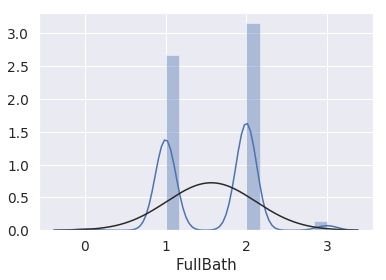

<Figure size 432x288 with 0 Axes>

In [31]:
#histogram and normal probability plot
sns.distplot(df_train['FullBath'], fit=norm);
fig = plt.figure()
#data transformation
#df_train['FullBath'] = np.log(df_train['FullBath'])
#transformed histogram and normal probability plot
#sns.distplot(df_train['FullBath'], fit=norm);
#fig = plt.figure()

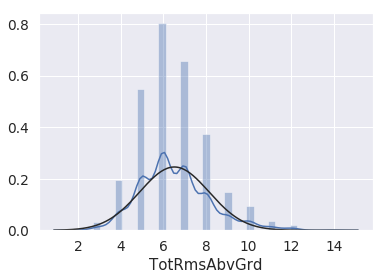

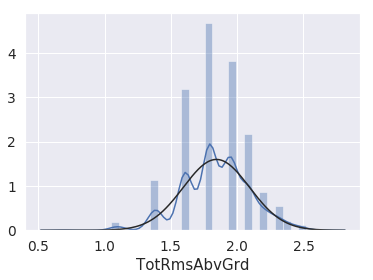

<Figure size 432x288 with 0 Axes>

In [32]:
#histogram and normal probability plot
sns.distplot(df_train['TotRmsAbvGrd'], fit=norm);
fig = plt.figure()
#data transformation
df_train['TotRmsAbvGrd'] = np.log(df_train['TotRmsAbvGrd'])
#transformed histogram and normal probability plot
sns.distplot(df_train['TotRmsAbvGrd'], fit=norm);
fig = plt.figure()

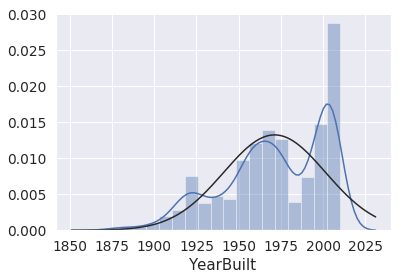

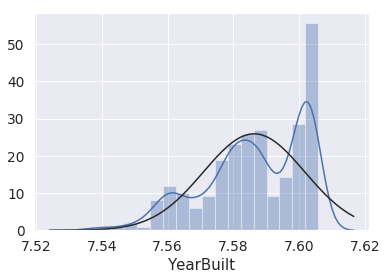

<Figure size 432x288 with 0 Axes>

In [33]:
#histogram and normal probability plot
sns.distplot(df_train['YearBuilt'], fit=norm);
fig = plt.figure()
#data transformation
df_train['YearBuilt'] = np.log(df_train['YearBuilt'])
#transformed histogram and normal probability plot
sns.distplot(df_train['YearBuilt'], fit=norm);
fig = plt.figure()